In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

## Importation du fichier csv commandes 

In [33]:
data=pd.read_csv('../base/commandes.csv',sep=';', encoding='ISO-8859-1')

In [34]:
data.head()

,id_commande,date_commande,id_produit,quantité,entrepôt,statut
0,O000001,22/07/2024,P00527,6,Marseille,Livré
1,O000002,18/02/2024,P00336,5,Lyon,Expédié
2,O000003,19/03/2024,P00084,6,Lyon,Annulé
3,O000004,28/08/2024,P00887,8,Lyon,Livré
4,O000005,14/12/2024,P00778,1,Marseille,Annulé


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_commande    50000 non-null  object
 1   date_commande  50000 non-null  object
 2   id_produit     50000 non-null  object
 3   quantité       50000 non-null  int64 
 4   entrepôt       50000 non-null  object
 5   statut         50000 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


## Convertir la date de objet a Date Time

In [36]:
data['date_commande'] = pd.to_datetime(data['date_commande'], errors='coerce')


C:\Users\glenn\AppData\Local\Temp\ipykernel_25856\1843864014.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date_commande'] = pd.to_datetime(data['date_commande'], errors='coerce')


In [37]:
data['date_commande'].dtype  # doit afficher datetime64[ns]


dtype('<M8[ns]')

## Vérification des valeurs nulles 

In [38]:
data.isnull().sum()

id_commande      0
date_commande    0
id_produit       0
quantité         0
entrepôt         0
statut           0
dtype: int64

## Stat descriptive 

In [39]:
# Colonnes numériques
data[['quantité']].describe().T

,count,mean,std,min,25%,50%,75%,max
quantité,50000.0,4.9873,2.586301,1.0,3.0,5.0,7.0,9.0


In [40]:
# Colonnes numériques
data[['statut', 'entrepôt', 'id_produit']].describe().T


,count,unique,top,freq
statut,50000,4,Livré,29739
entrepôt,50000,3,Paris,16778
id_produit,50000,1000,P00762,75


# Visualisations

## Top 10 des produits les plus commandés 
### 🎯 Objectif : Identifier les produits les plus demandés

Ce graphique présente les 10 produits ayant généré le plus de volume en termes de quantité commandée.  
Il permet de repérer les produits "stars" qui représentent une part importante de l'activité.


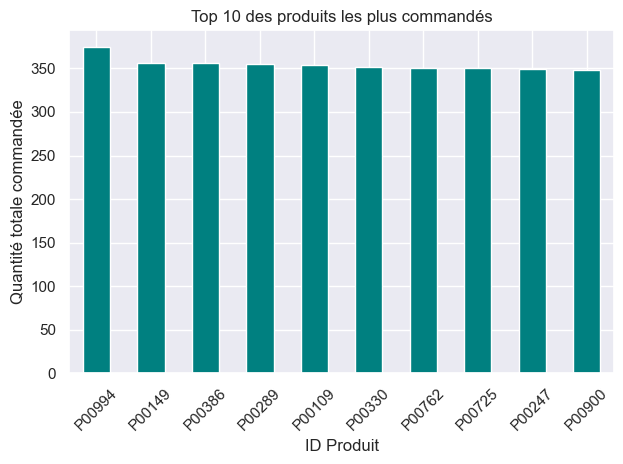

In [41]:
top_produits = data.groupby('id_produit')['quantité'].sum().sort_values(ascending=False).head(10)
top_produits.plot(kind='bar', color='teal')
plt.title("Top 10 des produits les plus commandés")
plt.xlabel("ID Produit")
plt.ylabel("Quantité totale commandée")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Produit avec la quantité moyenne la plus élevée

### 🎯 Objectif : Analyser les produits commandés en grande quantité par commande

Ce graphique montre les produits pour lesquels, lorsqu'ils sont commandés, les clients en prennent beaucoup à la fois.  
Cela peut révéler des produits vendus en gros, en pack, ou à usage industriel.



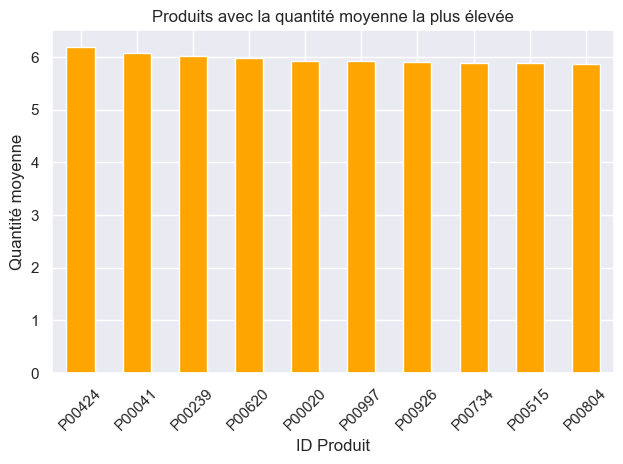

In [42]:
top_moyenne = data.groupby('id_produit')['quantité'].mean().sort_values(ascending=False).head(10)
top_moyenne.plot(kind='bar', color='orange')
plt.title("Produits avec la quantité moyenne la plus élevée")
plt.xlabel("ID Produit")
plt.ylabel("Quantité moyenne")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Produits les plus frequemments commandés 

### 🎯 Objectif : Identifier les produits les plus fréquemment achetés

Ce graphique affiche les produits qui reviennent le plus souvent dans les commandes, indépendamment de la quantité.  
Cela permet de détecter les produits les plus populaires en fréquence.


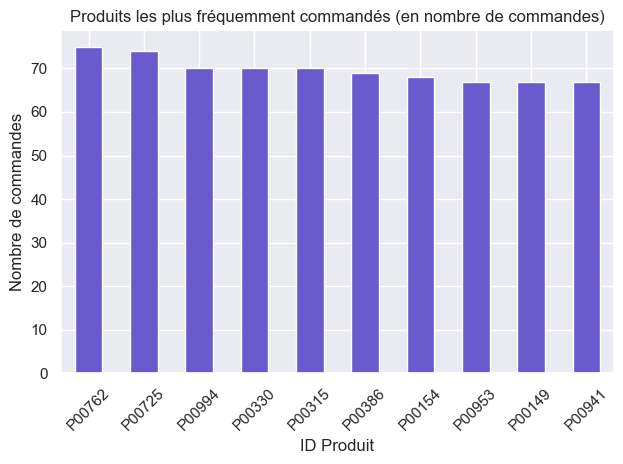

In [43]:
nb_commandes = data['id_produit'].value_counts().head(10)
nb_commandes.plot(kind='bar', color='slateblue')
plt.title("Produits les plus fréquemment commandés (en nombre de commandes)")
plt.xlabel("ID Produit")
plt.ylabel("Nombre de commandes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ScatterPlot frequence vs quantité 

### ## 🎯 Objectif : Analyse croisée fréquence vs quantité

Ce graphique met en relation :
- L’axe X : le **nombre de commandes** par produit (fréquence)
- L’axe Y : la **quantité totale** commandée par produit

Il permet d’identifier plusieurs **profils de produits** :
- 📦 **Produits à forte quantité mais peu fréquents** (gros volumes occasionnels)
- 🛒 **Produits fréquents mais à faible volume** (populaires en petite quantité)
- 🌟 **Produits en top volume et top fréquence** (produits stratégiques)

Cette analyse visuelle aide à orienter les stratégies d’approvisionnement, de stockage, et de mise en avant commerciale.


## 🧾 Synthèse – Analyse des produits commandés

L’analyse des produits à travers plusieurs angles nous a permis de dégager des tendances fortes :

### 🔹 1. Produits les plus commandés (quantité totale)
Les produits tels que `P00994`, `P00149` ou `P00386` sont ceux ayant généré les **plus gros volumes de commandes**.  
👉 Ces produits sont **stratégiques** pour la logistique et la gestion des stocks.

### 🔹 2. Produits les plus fréquemment commandés
D'autres produits comme `P00762` ou `P00725` apparaissent **très souvent** dans les commandes, mais avec des quantités moindres.  
👉 Ce sont des **produits populaires** qui peuvent être exploités à des fins **marketing** (fidélisation, promotions…).

### 🔹 3. Produits avec les plus grandes quantités moyennes
Certains produits, comme `P00424`, sont commandés **moins souvent**, mais en **très grande quantité** à chaque fois.  
👉 Ces produits peuvent correspondre à des **commandes spécifiques ou B2B**, et nécessitent une attention particulière en approvisionnement.

### 🔹 4. Analyse croisée (Fréquence vs Quantité totale)
Une visualisation en scatter plot a mis en évidence des **profils de produits différents** :
- 📦 Produits de **masse** : peu fréquents mais à gros volumes (`P004`)
- 🛒 Produits **populaires** : très fréquents mais en petites quantités (`P005`)
- 🌟 Produits **équilibrés** : fréquemment commandés avec des volumes élevés (`P002`, `P003`)

---

### ✅ Conclusion
L'analyse croisée de la quantité, de la fréquence et de la moyenne permet de :
- Cibler les produits à **fort enjeu logistique**
- Mettre en avant les produits **phare pour les ventes**
- Identifier des produits à **surveiller ou à valoriser** commercialement

Ce travail pose une base solide pour croiser ensuite avec les **données d’entrepôts**, de **stocks** ou de **retours produits**.
